In [1]:
%%html
<style type='text/css'>.CodeMirror{
font-size: 18px;
</style>

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.rendered_html { font-size: 18px; }</style>"))

# Linear Regression

Given data about automobiles, we'd like to predict their gasoline consumption from their engine horsepower.



In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline


Bad key "text.kerning_factor" on line 4 in
/home/sven/lib/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [4]:
def readDat(fname):
    '''
    :param fname: input file
    Assumes a first comment line is attribute names
    Other rows are attribute values
    :returns: numpy array of data, one example per row.
    '''
    with open(fname,'r') as fd:
        dat = []
        attribs = None
        for line in fd.readlines():
            if line[0] == '#': #ignore comments
                attribs = line.split()[1:]
            else:
                x = line.split()
                vals = [ float(val) for val in x ]
                dat.append( vals ) # convert to floats and append
    return attribs,np.array(dat)

In [5]:
attr,dat = readDat('auto.dat')

## Use Pandas to open Auto data

In [6]:
## Look at data
auto_dataframe = pd.DataFrame(dat,columns=attr)
#pd.plotting.scatter_matrix(auto_dataframe,figsize=(15,15),marker='0',hist_kwds={'bins':20},s=60,alpha=0.8);

In [7]:
df = auto_dataframe
df.head()

,cyl,disp,horse,weight,accel,year,mpg
0,8.0,307.0,130.0,3504.0,12.0,70.0,18.0
1,8.0,350.0,165.0,3693.0,11.5,70.0,15.0
2,8.0,318.0,150.0,3436.0,11.0,70.0,18.0
3,8.0,304.0,150.0,3433.0,12.0,70.0,16.0
4,8.0,302.0,140.0,3449.0,10.5,70.0,17.0


In [8]:
import os

def myplot(df,xvar,yvar):
    '''plot using pandas col names'''
    plt.figure(figsize=(15,10))
    plt.rcParams.update({'font.size': 22})
    plt.scatter(df[xvar],df[yvar])
    plt.xlabel(xvar)
    plt.ylabel(yvar)
    
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(".", fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

Saving figure horseVSmpg


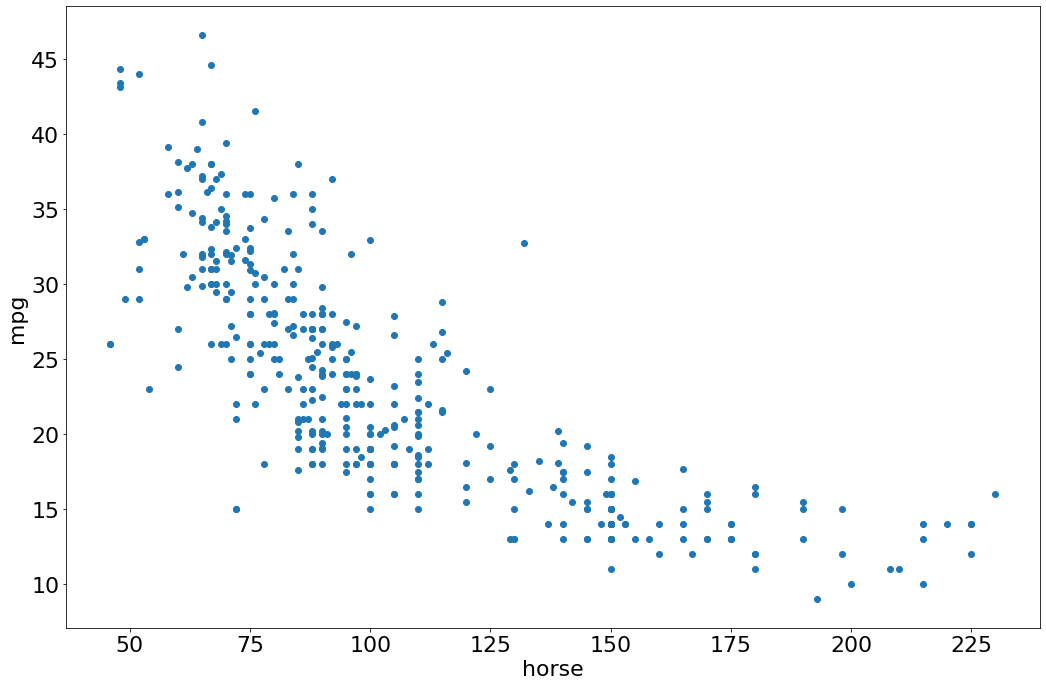

In [9]:
myplot(df,'horse','mpg')
save_fig('horseVSmpg')

## Let's fit MPG vs. horsepower using linear regression.

In [10]:
def gradStep(dat,p):
    '''
    Calculate one update of the parameters in p via gradient descent
    algorithm.
    dat: all input data
    p: parameters of linear equation to be adjusted
    '''
    sum = np.zeros(2)
    # Variables are x = x[0:2], with x[0] always equal to 1.
    for x in dat:
        sum += (np.dot(p,x[0:2]) - x[2]) * x[0:2]
    return sum / len(dat)


def cost(dat,p):
    '''Cost function (sum of squares of differences)'''
    sum = 0
    for x in dat:
        sum += ( np.dot(x[0:2], p) - x[2] )**2
    return sum / (2.0 * len(dat))

In [11]:
def gradStepStoch(dat,p,alpha):
    '''
    Calculate one update of the parameters in p via stochastic gradient descent
    algorithm.
    dat: all input data
    p: parameters of linear equation to be adjusted
    '''
    # For all data items sum term, (h(x) - y)*x 
    # Predicted value is y = x[2]
    # Variables are x = x[0:2], with x[0] always equal to 1.
    for x in dat:
        # It's critical to separate calculation of diff
        # from changes to parameters p!
        diff = np.dot(p,x[0:2]) - x[2]
        p[0] += -alpha * diff * x[0]
        p[1] += -alpha * diff * x[1]


In [12]:
def regress(dat,limit=0.001,alpha=1e-8):
    '''Use linear regression to predict col2 from col1 in dat'''
    p = np.random.rand(2) - 0.5   # two random values ((these are the parameters to determine)
   
    newp = p.copy()
    
    err = cost(dat,p)
    print(err)
    olderr = 2 * err

    while olderr - err > limit: # terminate when error change is small
        gradStepStoch(dat,p,alpha) # calculate gradient step
        olderr = err
        err = cost(dat,p) # determine cost (error)
    print('Error',err,olderr)
    print ('Parameters: ', p)

In [13]:
ndat = len(df['horse'])
bias = np.ones((ndat,1))
regressDat = np.concatenate((bias,df[['horse','mpg']].to_numpy())
                            ,axis=1)

In [14]:
regressDat[1:10]


array([[  1., 165.,  15.],
       [  1., 150.,  18.],
       [  1., 150.,  16.],
       [  1., 140.,  17.],
       [  1., 198.,  15.],
       [  1., 220.,  14.],
       [  1., 215.,  14.],
       [  1., 225.,  14.],
       [  1., 190.,  15.]])

## Plot the data and the obtained line.

In [15]:
regress(regressDat,1e-5,1e-9) # How do the estimated parameters look?

165.45820104342337
Error 107.08245271702607 107.08246270621464
Parameters:  [-0.00224711  0.17876723]


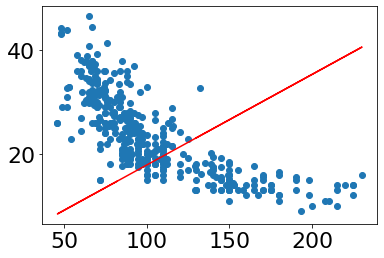

In [16]:
x= regressDat[:,1]
plt.scatter(x,regressDat[:,2])
plt.plot(x, .39 + 0.175*x,'r')

## Is this correct?  Can you fix it?

## Compare with sklearn

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
nrows = len(regressDat)
x = regressDat[:,1].reshape((nrows,1))
y = regressDat[:,2].reshape((nrows,1))
lr = LinearRegression().fit(x,y)
m = lr.coef_
b = lr.intercept_
print(lr.intercept_,lr.coef_) # intercept and slope

[39.93586102] [[-0.15784473]]


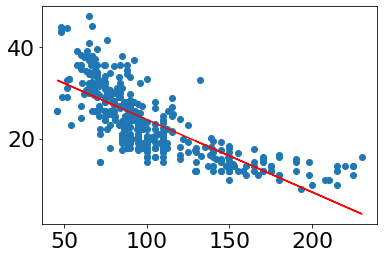

In [19]:
x= regressDat[:,1]
plt.scatter(x,regressDat[:,2])
plt.plot(x, lr.intercept_ + lr.coef_[0]*x,'r')

## We clearly have a problem, right?

Let's clean up our data so that all variables have the same scale.  When variables are of different scales, the derivative of one can completely dominate the contribution of the other variables.

# Pandas and Enhancements to Regression

As it stands, some variables like weight have large values, whereas others, like the number of cylinders, have small values.  We can put all variables on equal footing if we convert them to z scores $z = \frac{(x-\mu)}{\sigma}$

In [20]:
from sklearn import preprocessing
from numpy.linalg import inv

class rescale:
    '''Rescale vars and provide inverse.
        Assumes zeroth column is all ones, the bias.
    '''
    def __init__(self,dat):
        self.dat = dat
        self.means = dat.mean(axis=0)
        self.stdevs = dat.std(axis=0)
        if 0 in self.stdevs[1:]:
            raise Exception("Zero stdev does not permit transform.")
        
    def scale(self):
        '''Return the data columns scaled to each have 
        zero mean and stdev of 1.  The zeroth column is
        not scaled.
        '''
        self.scaled = preprocessing.scale(self.dat)
        self.scaled[:,0] = self.dat[:,0] # Copy back the bias column
        return self.scaled
    
    def transform(self,x):
        '''Transform x[1:] to new zscore.  Does not change x[0].'''
        z = np.zeros(len(x))
        z[0] = x[0]
        for i in range(1,len(x)):
            z[i] = (x[i] - self.means[i]) / self.stdevs[i]
        return z
              

In [21]:
scaler = rescale(regressDat)
scaledDat = scaler.scale()
print('means',np.mean(scaledDat,axis=0))
print('deviations',np.std(scaledDat,axis=0))

means [ 1.00000000e+00 -3.96508223e-16 -3.83480096e-16]
deviations [0. 1. 1.]


In [22]:
#Check with SciKitlearn
nrows = len(regressDat)
x = scaledDat[:,1].reshape((nrows,1))
y = scaledDat[:,2].reshape((nrows,1))
lr = LinearRegression().fit(x,y)
m = lr.coef_
b = lr.intercept_
print('b and m',b,m)

b and m [-3.8075377e-16] [[-0.77842678]]


In [23]:
regress(scaledDat,1e-10,1e-5)

0.32158346296586793
Error 0.19702596121146446 0.19702596131013658
Parameters:  [ 4.13690304e-04 -7.78522558e-01]


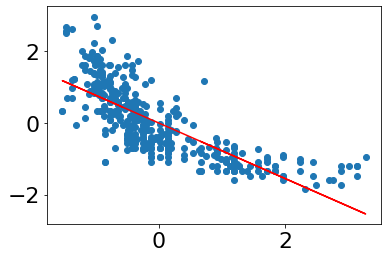

In [24]:
x= scaledDat[:,1]
plt.scatter(x,scaledDat[:,2])
plt.plot(x, lr.intercept_ + lr.coef_[0]*x,'r')

## Lesson: Gradient methods are sensitive to differences in variable scale

### Note
The values we derive are in the renormalized space.  When testing data, we must preserve the mean and standard deviation of the __training data__ so we can renormalize the testing data in the same manner.

## Regularization

When we fit numerous parameters, we would like to avoid overfitting and we may believe that some parameters are more important predictors than others.  Looking at the scatterplots above, which predictors have the most obvious relationships to the MPG we want to predict?

One approach to this problem is to enforce a constraint on all parameters that we add to the loss function , $J(\theta)$.  In particular we use
$
J(\theta) = \sum_{i=1}^{m} ((\sum_{k=1}^{n} \theta_k x^{(i)}_k) - y^{(i)})^2 + \lambda \sum_{k=1}^{n} \theta_k^2
$
Of course, we choose a weighting value, $\lambda$ and we must still decide whether we want to use stochastic gradient descent.

## Rewrite our code a bit and include regularization.

In [25]:
def cost(dat,y,p,regwt=0.0):
    '''Cost function (sum of squares of differences).
        Implements L2 regularization
    '''
    sum = 0
    for i,x in enumerate(dat):
        sum += ( np.dot(x, p) - y[i] )**2 + regwt * np.dot(p,p)
    return sum / (2.0 * len(dat))

def gradStepStoch(dat,y,p,alpha,regwt=0.0):
    '''
    Calculate one update of the parameters in p via stochastic gradient descent
    algorithm.  
    dat: all input data
    p: parameters of linear equation to be adjusted
    regwt: regularization parameter for L2 regularization
    '''
    # For all data items sum term, (h(x) - y)*x 
    # Predicted value is y = x[-1]
    # Variables are x = x[0:-1], with x[0] always equal to 1.
    for i,x in enumerate(dat):
        diff = np.dot(p,x) - y[i]  # TODO: add the new term!
        p += -alpha * (diff * x + regwt * p)
        

def regress(dat,y,regwt=0.0,alpha=1e-3,limit=1e-3):
    '''Use linear regression to predict col2 from col1 in dat'''
    nparams = np.shape(dat)[1] 
    p = np.random.rand(nparams) - 0.5 # two random values ((these are the parameters to determine)
 
    err = cost(dat,y,p)
    print(err)
    olderr = 2 * err

    while olderr - err > limit: # terminate when error change is small
        gradStepStoch(dat,y,p,alpha,regwt) # calculate gradient step
        olderr = err
        err = cost(dat,y,p) # determine cost (error)
    print('Error',err,olderr)

    print ('Parameters: ', p)


In [26]:
# Check our old problem.
x = scaledDat[:,:-1]
y = scaledDat[:,-1]
regress(x,y,regwt=0.0,alpha=1e-3,limit=1e-6)

0.5021256961892292
Error 0.19789602016485885 0.19787900493325136
Parameters:  [ 0.03475365 -0.80150236]


## Consider regression using ALL features

In [27]:
# Now we rescale ALL data
nrows = len(dat)
bias = np.ones((nrows,1))
allDat = np.concatenate( (bias,dat),axis=1)
scaler = rescale(allDat)
allScaled = scaler.scale()

In [28]:
np.shape(allDat)

(392, 8)

In [29]:
x = allScaled[:,:-1]
y = allScaled[:,-1]
regress(x,y,regwt=0.3,alpha=1e-4,limit=1e-10)

0.6146793067299247
Error 0.10850069101223289 0.10850069111097269
Parameters:  [ 0.00081032 -0.13712099 -0.14813437 -0.1430931  -0.29257268 -0.01266447
  0.25825525]


In [30]:
rwt=0.9
regress(x,y,rwt,alpha=1e-5,limit=1e-9)
            

0.2673008295882341
Error 0.12913895639469855 0.12913895739192197
Parameters:  [ 0.00021622 -0.13964134 -0.14758941 -0.13819707 -0.20237048  0.02092353
  0.18525837]


In [31]:
df.head()

,cyl,disp,horse,weight,accel,year,mpg
0,8.0,307.0,130.0,3504.0,12.0,70.0,18.0
1,8.0,350.0,165.0,3693.0,11.5,70.0,15.0
2,8.0,318.0,150.0,3436.0,11.0,70.0,18.0
3,8.0,304.0,150.0,3433.0,12.0,70.0,16.0
4,8.0,302.0,140.0,3449.0,10.5,70.0,17.0


In [32]:
#Check with SciKitlearn
from sklearn.linear_model import Ridge
nrows = len(x)
xx = allScaled[:,1:-1]
yy = allScaled[:,-1]
ridgreg = Ridge(alpha=1.e-9)
ridgreg.fit(xx,yy)
m = lr.coef_
b = lr.intercept_
print('b and m',b,m)

b and m [-3.8075377e-16] [[-0.77842678]]
